In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

d0 = pd.read_csv('mnist_train.csv')

print(d0.head(5))

# Save the label into variable l
l = d0['label']

# Drop the label feature and store the pixel data in d
d = d0.drop('label', axis = 1)


   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         

In [2]:
print(d.shape)
print(l.shape)

(42000, 784)
(42000,)


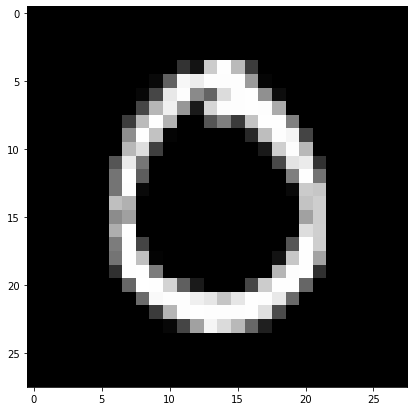

0


In [3]:
# Display or plot a number
plt.figure(figsize = (7,7))
idx = 1222
grid_data = d.iloc[idx].to_numpy().reshape(28,28) # Reshpae from 1D to 2D
plt.imshow(grid_data, interpolation = 'none', cmap = 'gray')
plt.show()
print(l[idx])

In [4]:
# 2D VISUALIZATION USING PCA

# Pick first 15k data-points to work on for time-efficiency
# Exercise: perforn the same analysis on all of 42k data-points

label = l.head(15000)
data = d.head(15000)

print("The shape of sample data = ", data.shape)

The shape of sample data =  (15000, 784)


In [5]:
# Data-preprocessing: Standardizing the data

from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler().fit_transform(data)
print(standardized_data.shape)

(15000, 784)


In [6]:
# Find the co-variance matrix which is: A^T * A
sample_data = standardized_data

# Matrix multiplication using numpy
covar_matrix = np.matmul(sample_data.T, sample_data)

print("The shape of co-variance matrix is: ", covar_matrix.shape)

The shape of co-variance matrix is:  (784, 784)


In [7]:
# Finding the top tow eigen-values and corresponding eigen-vectors
# for projecting onto a 2-dim space

from scipy.linalg import eigh

# the parameter 'eigvals' is defined (low value to high value)
# eigh funcion will return the eigen values in ascending order
# this code generates only the top 2 (782 and 783) eigen values

values, vectors = eigh(covar_matrix, eigvals = (782, 783))

print("Shape of eigen vectors = ", vectors.shape)

# Converting the eigen vectors into (2, d) shape 

vectors = vectors.T

print("Updated shape of eigen vectors = ", vectors.shape)

# here vector[1] represent the eigen vector corresponding 1st principal eigen value
# here vector[0] represent the eigen vector corresponding 2nd principal eigen value

Shape of eigen vectors =  (784, 2)
Updated shape of eigen vectors =  (2, 784)


In [8]:
# projecting the original data sample on the plane
#formed by the two principal eigen vecotrs by vector-vector multiplication

import matplotlib.pyplot as plt
new_coordinates = np.matmul(vectors, sample_data.T)
print("Resultant new data points's shape ", vectors.shape, "X", sample_data.T.shape, "= ", new_coordinates.shape)

Resultant new data points's shape  (2, 784) X (784, 15000) =  (2, 15000)


In [9]:
import pandas as pd

#appending label to the 2d projected data
new_coordinates = np.vstack((new_coordinates, label)).T

# Creating a new data frame for ploting the labeled points
dataframe = pd.DataFrame(data = new_coordinates, columns = ("1st_Principal", "2nd_Principal", "label"))
print(dataframe.head())

   1st_Principal  2nd_Principal  label
0      -5.558661      -5.043558    1.0
1       6.193635      19.305278    0.0
2      -1.909878      -7.678775    1.0
3       5.525748      -0.464845    4.0
4       6.366527      26.644289    0.0


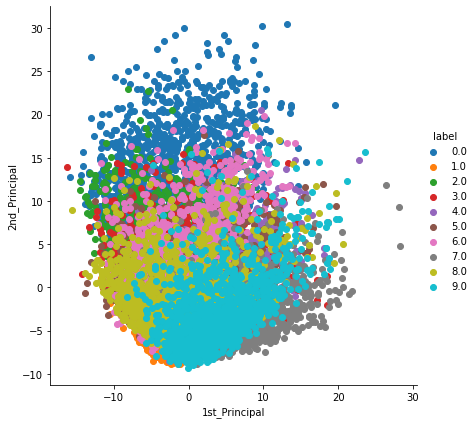

In [10]:
# ploting the 2d data points with seaborn
import seaborn as sn
sn.FacetGrid(dataframe, hue = 'label', height = 6).map(plt.scatter, '1st_Principal', '2nd_Principal').add_legend()
plt.show()

In [11]:
# PCA USING SKIKIT-LEARN
from sklearn import decomposition
pca = decomposition.PCA()


In [12]:
# configuring the parameters
# the number of components = 2
pca.n_components = 2
pca_data = pca.fit_transform(sample_data)

# pca_reduced will contain the 2-d projects of simple data
print("shape of pca_reduced.shape = ", pca_data.shape)

shape of pca_reduced.shape =  (15000, 2)


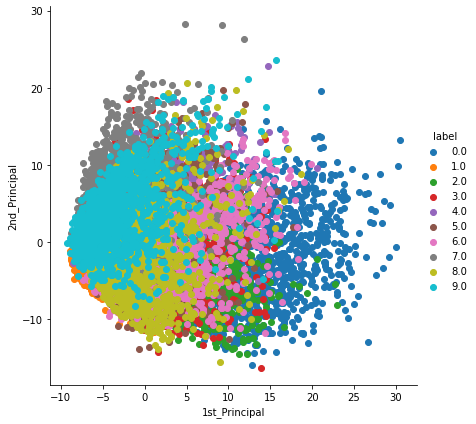

In [13]:
# Attaching the label for each 2-d data point
pca_data = np.vstack((pca_data.T, label)).T

# creating a new data frame which help us ploting the result
pca_df = pd.DataFrame(data = pca_data, columns = ("1st_Principal", "2nd_Principal", "label"))
sn.FacetGrid(pca_df, hue = 'label', height = 6).map(plt.scatter, '1st_Principal', '2nd_Principal').add_legend()
plt.show()

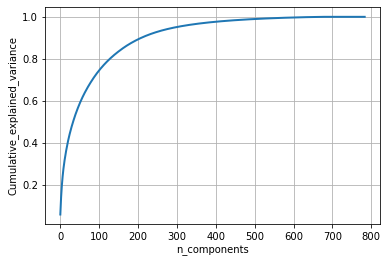

In [14]:
# PCA for dimensionality reduction (non-visualization)

pca.n_components = 784
pca_data = pca.fit_transform(sample_data)

percentage_var_explained = pca.explained_variance_/np.sum(pca.explained_variance_)

cum_var_explained = np.cumsum(percentage_var_explained)

# Plot the pca spectrum

plt.clf()
plt.plot(cum_var_explained, linewidth = 2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative_explained_variance')
plt.show()

C:\Users\Irshad\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Irshad\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


(1000, 2)
(1000, 3)


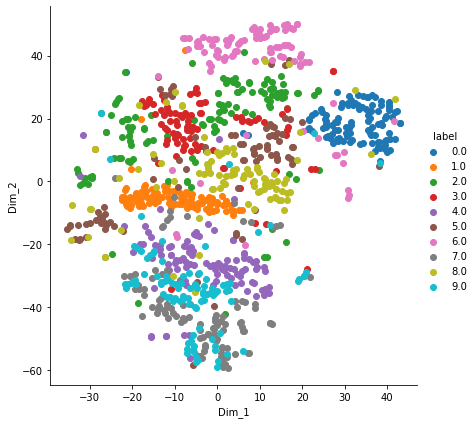

In [23]:
# t-SNE USING SCIKIT-LEARN
from sklearn.manifold import TSNE
# picking up the 1000 points because t-SNE takes a lot of time for 15k points
data_1000 = standardized_data[0:1000, :]
label_1000 = label[0:1000]

model = TSNE(n_components = 2, random_state = 0)
# Configuring the parameters
# Number of components = 2
# Default perplexity = 30
# Default learning rate = 200
# Default maximum number of iteration for optimization = 1000

tsne_data = model.fit_transform(data_1000)
print(tsne_data.shape)
# Creating a new dataframe which help us in plotting the result data
tsne_data = np.vstack((tsne_data.T, label_1000)).T

print(tsne_data.shape)

tsne_df = pd.DataFrame(data = tsne_data, columns = ("Dim_1", "Dim_2", "label"))

# ploting the result of tsne
sn.FacetGrid(tsne_df, hue = 'label', height = 6).map(plt.scatter, "Dim_1", "Dim_2").add_legend()
plt.show()

C:\Users\Irshad\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Irshad\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


(1000, 2)
(1000, 3)


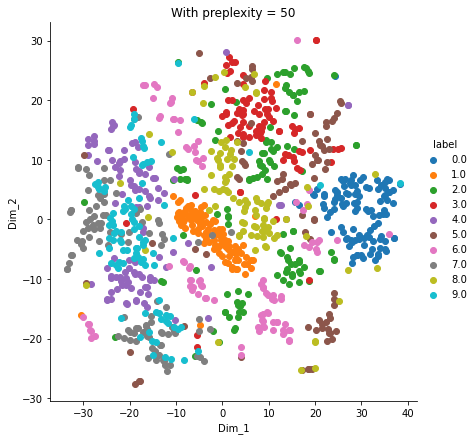

In [24]:
model = TSNE(n_components = 2, random_state = 0, perplexity = 50)

tsne_data = model.fit_transform(data_1000)
print(tsne_data.shape)
# Creating a new dataframe which help us in plotting the result data
tsne_data = np.vstack((tsne_data.T, label_1000)).T

print(tsne_data.shape)

tsne_df = pd.DataFrame(data = tsne_data, columns = ("Dim_1", "Dim_2", "label"))

# ploting the result of tsne
sn.FacetGrid(tsne_df, hue = 'label', height = 6).map(plt.scatter, "Dim_1", "Dim_2").add_legend()
plt.title("With preplexity = 50")
plt.show()

C:\Users\Irshad\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Irshad\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


(1000, 2)
(1000, 3)


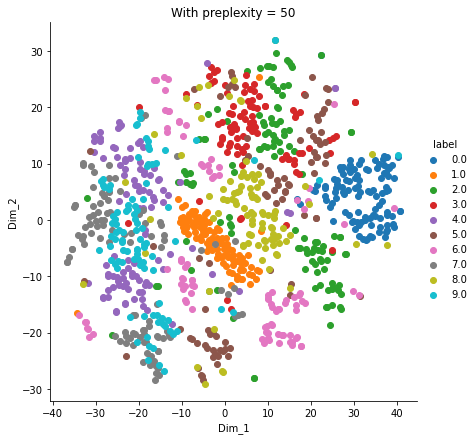

In [25]:
model = TSNE(n_components = 2, random_state = 0, perplexity = 50, n_iter = 5000)

tsne_data = model.fit_transform(data_1000)
print(tsne_data.shape)
# Creating a new dataframe which help us in plotting the result data
tsne_data = np.vstack((tsne_data.T, label_1000)).T

print(tsne_data.shape)

tsne_df = pd.DataFrame(data = tsne_data, columns = ("Dim_1", "Dim_2", "label"))

# ploting the result of tsne
sn.FacetGrid(tsne_df, hue = 'label', height = 6).map(plt.scatter, "Dim_1", "Dim_2").add_legend()
plt.title("With preplexity = 50 and iteration = 5000")
plt.show()

C:\Users\Irshad\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Irshad\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


(1000, 2)
(1000, 3)


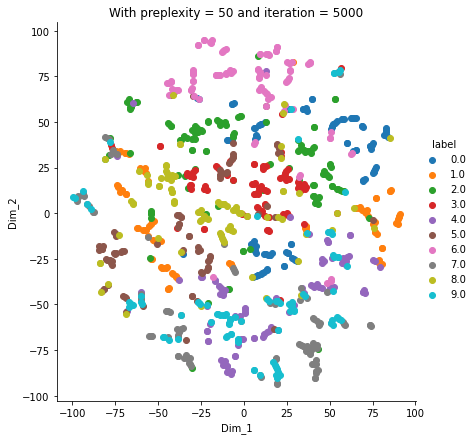

In [26]:
model = TSNE(n_components = 2, random_state = 0, perplexity = 2)

tsne_data = model.fit_transform(data_1000)
print(tsne_data.shape)
# Creating a new dataframe which help us in plotting the result data
tsne_data = np.vstack((tsne_data.T, label_1000)).T

print(tsne_data.shape)

tsne_df = pd.DataFrame(data = tsne_data, columns = ("Dim_1", "Dim_2", "label"))

# ploting the result of tsne
sn.FacetGrid(tsne_df, hue = 'label', height = 6).map(plt.scatter, "Dim_1", "Dim_2").add_legend()
plt.title("With preplexity = 50 and iteration = 5000")
plt.show()

C:\Users\Irshad\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Irshad\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


(15000, 2)
(15000, 3)


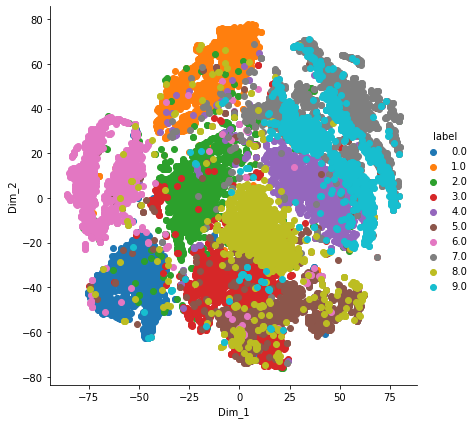

In [27]:
# EXERCISE: Run the same analysis using 42k points(standardized it first)

# For 15k point
data_15000 = standardized_data
label_15000 = label

model = TSNE(n_components = 2, random_state = 0)
# Configuring the parameters
# Number of components = 2
# Default perplexity = 30
# Default learning rate = 200
# Default maximum number of iteration for optimization = 1000

tsne_data = model.fit_transform(data_15000)
print(tsne_data.shape)
# Creating a new dataframe which help us in plotting the result data
tsne_data = np.vstack((tsne_data.T, label_15000)).T

print(tsne_data.shape)

tsne_df = pd.DataFrame(data = tsne_data, columns = ("Dim_1", "Dim_2", "label"))

# ploting the result of tsne
sn.FacetGrid(tsne_df, hue = 'label', height = 6).map(plt.scatter, "Dim_1", "Dim_2").add_legend()
plt.show()

C:\Users\Irshad\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Irshad\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


(42000, 2)
(42000, 3)


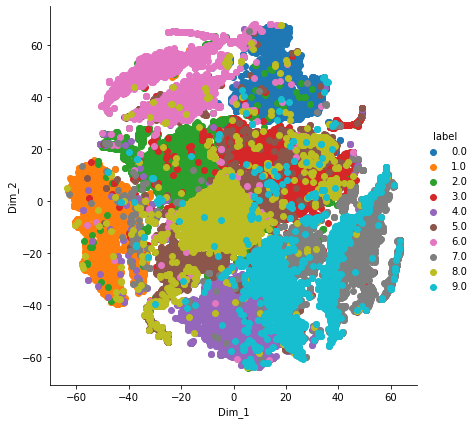

In [30]:
# For 42K points
label = l
data = d

from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler().fit_transform(data)

# For 15k point
data_42000 = standardized_data
label_42000 = label

model = TSNE(n_components = 2, random_state = 0)
# Configuring the parameters
# Number of components = 2
# Default perplexity = 30
# Default learning rate = 200
# Default maximum number of iteration for optimization = 1000

tsne_data = model.fit_transform(data_42000)
print(tsne_data.shape)
# Creating a new dataframe which help us in plotting the result data
tsne_data = np.vstack((tsne_data.T, label_42000)).T

print(tsne_data.shape)

tsne_df = pd.DataFrame(data = tsne_data, columns = ("Dim_1", "Dim_2", "label"))

# ploting the result of tsne
sn.FacetGrid(tsne_df, hue = 'label', height = 6).map(plt.scatter, "Dim_1", "Dim_2").add_legend()
plt.show()